# HR Prescriptive Analytics [Kaggle dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)


#### Problem Statement : **Predict if there will be a Attrition or not and perform Prescriptive Analytics**

#### Metrics Used : AUCPR Score

##### Importing Libraries and reading data

In [26]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import structured
from sklearn.model_selection import train_test_split

In [27]:
PATH = "/home/shivangmathur/Downloads/"

In [29]:
df_raw = pd.read_csv(f'{PATH}WA_Fn-UseC_-HR-Employee-Attrition.csv', low_memory=False)

In [30]:
map = {'Yes': 1, 'No': 0}

df_raw['Attrition'] = df_raw['Attrition'].map(map)

### Knowing about the data

In [31]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
display_all(df_raw.head(100).T)        

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Age,41,49,37,33,27,32,59,30,38,36,35,29,31,34,28,29,32,22,53,38,24,36,34,21,34,53,32,42,44,46,33,44,30,39,24,43,50,35,36,33,35,27,26,27,30,41,34,37,46,35,48,28,44,35,26,33,35,35,31,37,32,38,50,59,36,55,36,45,35,36,59,29,31,32,36,31,35,45,37,46,30,35,55,38,34,56,23,51,30,46,40,51,30,46,32,54,24,28,58,44
Attrition,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Non-Travel
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,809,153,670,1346,103,1389,334,1123,1219,371,673,1218,419,391,699,1282,1125,691,477,705,924,1459,125,895,813,1273,869,890,852,1141,464,1240,1357,994,721,1360,1065,408,1211,1229,626,1434,1488,1097,1443,515,853,1142,655,1115,427,653,989,1435,1223,836,1195,1339,664,318,1225,1328,1082,548,132,746,776,193,397,945,852,1214,111,573,1153,1400,541,432,288,669,530,632,1334,638,1093,1217,1353,120,682,489
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Research & Development,

In [32]:
df_raw.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          


### Feature Engineering


In [11]:
df_raw['DailyRateAge'] = df_raw['DailyRate']/df_raw['Age']
df_raw['PerfomanceReward'] = df_raw['PercentSalaryHike']/df_raw['PerformanceRating']
df_raw['TotalSatisfaction'] = df_raw['EnvironmentSatisfaction']*df_raw['JobSatisfaction']

In [12]:
df_raw.drop('EmployeeNumber',axis=1,inplace=True)


#### Converting into categorical values using train_cats technique of fastai


In [13]:
structured.train_cats(df_raw)


#### Handling missing values and performing one hot encoding using proc_df technique of fastai


In [14]:
df, y, nas = structured.proc_df(df_raw, 'Attrition')

#### Creating training and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=2)

#### Creating the model 

In [16]:
model = XGBClassifier(silent=True,
                      scale_pos_weight=5.2,
                      base_score=0.82,
                      booster = 'gbtree',
                      learning_rate=0.0711,  
                      colsample_bytree = 0.755,
                      subsample = 0.82,
                      min_child_weight=2,
                      max_delta_step = 3,
                     objective='binary:logistic',
                      gamma = 5,
                      n_estimators=1000, 
                      max_depth=6,
                     )

eval_set = [(X_test, y_test)]
eval_metric = ["aucpr"]
%time model.fit(X_train, y_train,early_stopping_rounds=200, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-aucpr:0.51181
Will train until validation_0-aucpr hasn't improved in 200 rounds.
[1]	validation_0-aucpr:0.560812
[2]	validation_0-aucpr:0.5423
[3]	validation_0-aucpr:0.523557
[4]	validation_0-aucpr:0.537781
[5]	validation_0-aucpr:0.539056
[6]	validation_0-aucpr:0.5555
[7]	validation_0-aucpr:0.543424
[8]	validation_0-aucpr:0.545178
[9]	validation_0-aucpr:0.551804
[10]	validation_0-aucpr:0.563872
[11]	validation_0-aucpr:0.567485
[12]	validation_0-aucpr:0.57778
[13]	validation_0-aucpr:0.574902
[14]	validation_0-aucpr:0.57853
[15]	validation_0-aucpr:0.590337
[16]	validation_0-aucpr:0.588462
[17]	validation_0-aucpr:0.579424
[18]	validation_0-aucpr:0.575493
[19]	validation_0-aucpr:0.577855
[20]	validation_0-aucpr:0.585333
[21]	validation_0-aucpr:0.583604
[22]	validation_0-aucpr:0.579097
[23]	validation_0-aucpr:0.580409
[24]	validation_0-aucpr:0.577709
[25]	validation_0-aucpr:0.577593
[26]	validation_0-aucpr:0.570143
[27]	validation_0-aucpr:0.578096
[28]	validation_0-aucpr:0.

[244]	validation_0-aucpr:0.601838
[245]	validation_0-aucpr:0.601838
[246]	validation_0-aucpr:0.601838
[247]	validation_0-aucpr:0.601838
[248]	validation_0-aucpr:0.601838
[249]	validation_0-aucpr:0.601838
[250]	validation_0-aucpr:0.601838
[251]	validation_0-aucpr:0.601838
[252]	validation_0-aucpr:0.601838
[253]	validation_0-aucpr:0.601838
[254]	validation_0-aucpr:0.601838
[255]	validation_0-aucpr:0.601838
[256]	validation_0-aucpr:0.601838
[257]	validation_0-aucpr:0.601563
[258]	validation_0-aucpr:0.601563
[259]	validation_0-aucpr:0.601563
[260]	validation_0-aucpr:0.601563
[261]	validation_0-aucpr:0.601563
[262]	validation_0-aucpr:0.601563
[263]	validation_0-aucpr:0.601075
[264]	validation_0-aucpr:0.601075
[265]	validation_0-aucpr:0.602232
[266]	validation_0-aucpr:0.602232
[267]	validation_0-aucpr:0.602232
[268]	validation_0-aucpr:0.602232
[269]	validation_0-aucpr:0.600936
[270]	validation_0-aucpr:0.600936
[271]	validation_0-aucpr:0.600936
[272]	validation_0-aucpr:0.600936
[273]	validati

XGBClassifier(base_score=0.82, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.755, gamma=5,
              learning_rate=0.0711, max_delta_step=3, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.2, seed=None,
              silent=True, subsample=0.82, verbosity=1)

In [17]:
pred_y = model.predict_proba(X_test)[:,1]
x = np.rint(pred_y)

In [18]:
type(x)

numpy.ndarray

#### Evaluating the results

In [25]:
import plotly.figure_factory as ff

z = [[.1, .3, .5, .7],
     [1, .8, .6, .4],
     [.6, .4, .2, .0],
     [.9, .7, .5, .3]]

fig = ff.create_annotated_heatmap(z, colorscale='Viridis')
fig.show()

ModuleNotFoundError: No module named 'skimage'

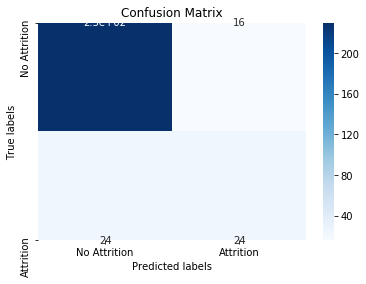

In [23]:
cm = confusion_matrix(y_test, x)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Attrition', 'Attrition']); ax.yaxis.set_ticklabels(['No Attrition', 'Attrition']);

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test, x, target_names=target_names))


### Feature Importance


In [ ]:
model.feature_importances_
from matplotlib import pyplot
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(18,10))
plot_importance(model, max_num_features=10, height=0.8, ax=ax)
pyplot.show()

### Explainig the Predictions

In [ ]:
import eli5
from eli5 import show_prediction
from IPython.display import display
from eli5 import explain_prediction

for x,y in zip(range(0,len(y_test)),y_test):
    
         if pred_y[x] >0.8 and y == 1 :
            print('Actual Label:',y )
            print('Predicted Probability:', pred_y[x])
        
            z = eli5.formatters.as_dataframe.explain_prediction_df(model.get_booster(), X_test.iloc[x],feature_names=list(df.columns))
            z = z[z['weight']>0]
            z['weight'] = (z['weight']/z['weight'].sum())*100
            z = z.head(10)
            z.drop('target',axis=1,inplace=True)
            z.index = np.arange(1, len(z) + 1)
            display(z.head())
